# B Meson Decay

### Task

* First plot the kaon, and assume that the pion is mistaken as a proton
* Next assume the following particle misidentifications are made 
    * A kaon mistaken for a proton
    * A proton mistaken for a kaon


$$B^0 \rightarrow J/\psi + K^- +\pi^+$$ 

$B^0$ is a b meson
* Mass = 5.28 GeV
* Composition = down + anti-bottom

$J/\psi$ - J/psi meson or psion
* Mass = 3.096 GeV
* Composition = charm + anti-charm quark
* Decays into $\mu^+$ and $\mu^-$

$K^-$ is the anti-particle of the Kaon or K Meson
* Mass = 0.494 GeV
* Composition = anti-up + strange quark

$\pi^+$ is a pion or pi meson
* Made up of an up and anti-down quark
* Mass = 0.1395 GeV

In [8]:
import numpy as np
import matplotlib.pylab as plt
from math import sqrt
import lhcb_tools as lhcb
%matplotlib inline

In [9]:
def mass(p4):
    E,px,py,pz = p4[0:4]
    m = (E**2-(px**2+py**2+pz**2))
    if m>=0:
        return sqrt(m)
    else:
        return sqrt(-m)
    
def add_4_vecs(p4s):
    E,px,py,pz = (0,0,0,0)

    for p4 in p4s:
        E += p4[0]
        px += p4[1]
        py += p4[2]
        pz += p4[3]

    p4tot = [E,px,py,pz]    
    return p4tot

def redefine_4_vec(p4,newmass):
    px = p4[1]
    py = p4[2]
    pz = p4[3]
    newE = np.sqrt(newmass*newmass + px*px + py*py + pz*pz)
    return [newE,px,py,pz]

In [19]:
infile = open('ToyMC_LHCb_BtoJpsiKpi.dat')

pion_mass = []
kaon_mass = []
muon_mass1 = []
muon_mass2 = []
jpsi_mass = []
bm_mass = [] # B meson

fake_lambda_b_mass1 = []
fake_lambda_b_mass2 = []
pq_mass1 = []
pq_mass2 = []

x_values1 = []
y_values1 = []
x_values2 = []
y_values2 = []

collisions = lhcb.get_collisions(infile,False)
print len(collisions)

for collision in collisions:
    
    pions,kaons,protons,muons,neutrinos,photons = collision
    
    pion_p4 = pions[0][0:4]
    mpion = mass(pion_p4)
    pion_mass.append(mpion)
    
    kaon_p4 = kaons[0][0:4]
    mkaon = mass(kaon_p4)
    kaon_mass.append(mkaon)
    
    muon_p41 = muons[0][0:4]
    mmuon1 = mass(muon_p41)
    muon_mass1.append(mmuon1)
    
    muon_p42 = muons[1][0:4]
    mmuon2 = mass(muon_p41)
    muon_mass2.append(mmuon2)
    
    jpsi_p4 = add_4_vecs([muon_p41,muon_p42])
    mjpsi = mass(jpsi_p4)
    jpsi_mass.append(mjpsi)
    #print jpsi_mass[0]

    bm_p4 = add_4_vecs([jpsi_p4,pion_p4,kaon_p4])
    mbm = mass(bm_p4)
    bm_mass.append(mbm)
    
    fake_proton1 = redefine_4_vec(pion_p4,0.938)
    fake_kaon = redefine_4_vec(fake_proton1,0.494)
    fake_proton2 = redefine_4_vec(kaon_p4,0.938)
    
    fake_lbp41 = add_4_vecs([jpsi_p4,kaon_p4,fake_proton1])
    mfake_lbp41 = mass(fake_lbp41)
    fake_lambda_b_mass1.append(mfake_lbp41)
    
    fake_lbp42 = add_4_vecs([jpsi_p4,fake_kaon,fake_proton2])
    mfake_lbp42 = mass(fake_lbp42)
    fake_lambda_b_mass2.append(mfake_lbp42)
    
    pq_lbp41 = add_4_vecs([fake_proton1,jpsi_p4])
    mpq1 = mass(pq_lbp41)
    pq_mass1.append(mpq1)
    
    pq_lbp42 = add_4_vecs([fake_proton2,jpsi_p4])
    mpq2 = mass(pq_lbp42)
    pq_mass2.append(mpq2)
    

    p41x = add_4_vecs([kaon_p4,fake_proton1])

    x1 = mass(p41x)
    x1 *= x1
    
    p41y = add_4_vecs([muon_p41,muon_p42,fake_proton1])
                    
    y1 = mass(p41y)
    y1 *= y1

    x_values1.append(x1)
    y_values1.append(y1)

    
    p42x = add_4_vecs([fake_kaon,fake_proton2])

    x2 = mass(p42x)
    x2 *= x2
    
    p42y = add_4_vecs([muon_p41,muon_p42,fake_proton2])
                    
    y2 = mass(p42y)
    y2 *= y2

    x_values2.append(x2)
    y_values2.append(y2)
    
fake_lambda_b_mass1 = np.array(fake_lambda_b_mass1)
pq_mass1 = np.array(pq_mass1)
x_values1 = np.array(x_values1)
y_values1 = np.array(y_values1)

fake_lambda_b_mass2 = np.array(fake_lambda_b_mass2)
pq_mass2 = np.array(pq_mass2)
x_values2 = np.array(x_values2)
y_values2 = np.array(y_values2)


10000


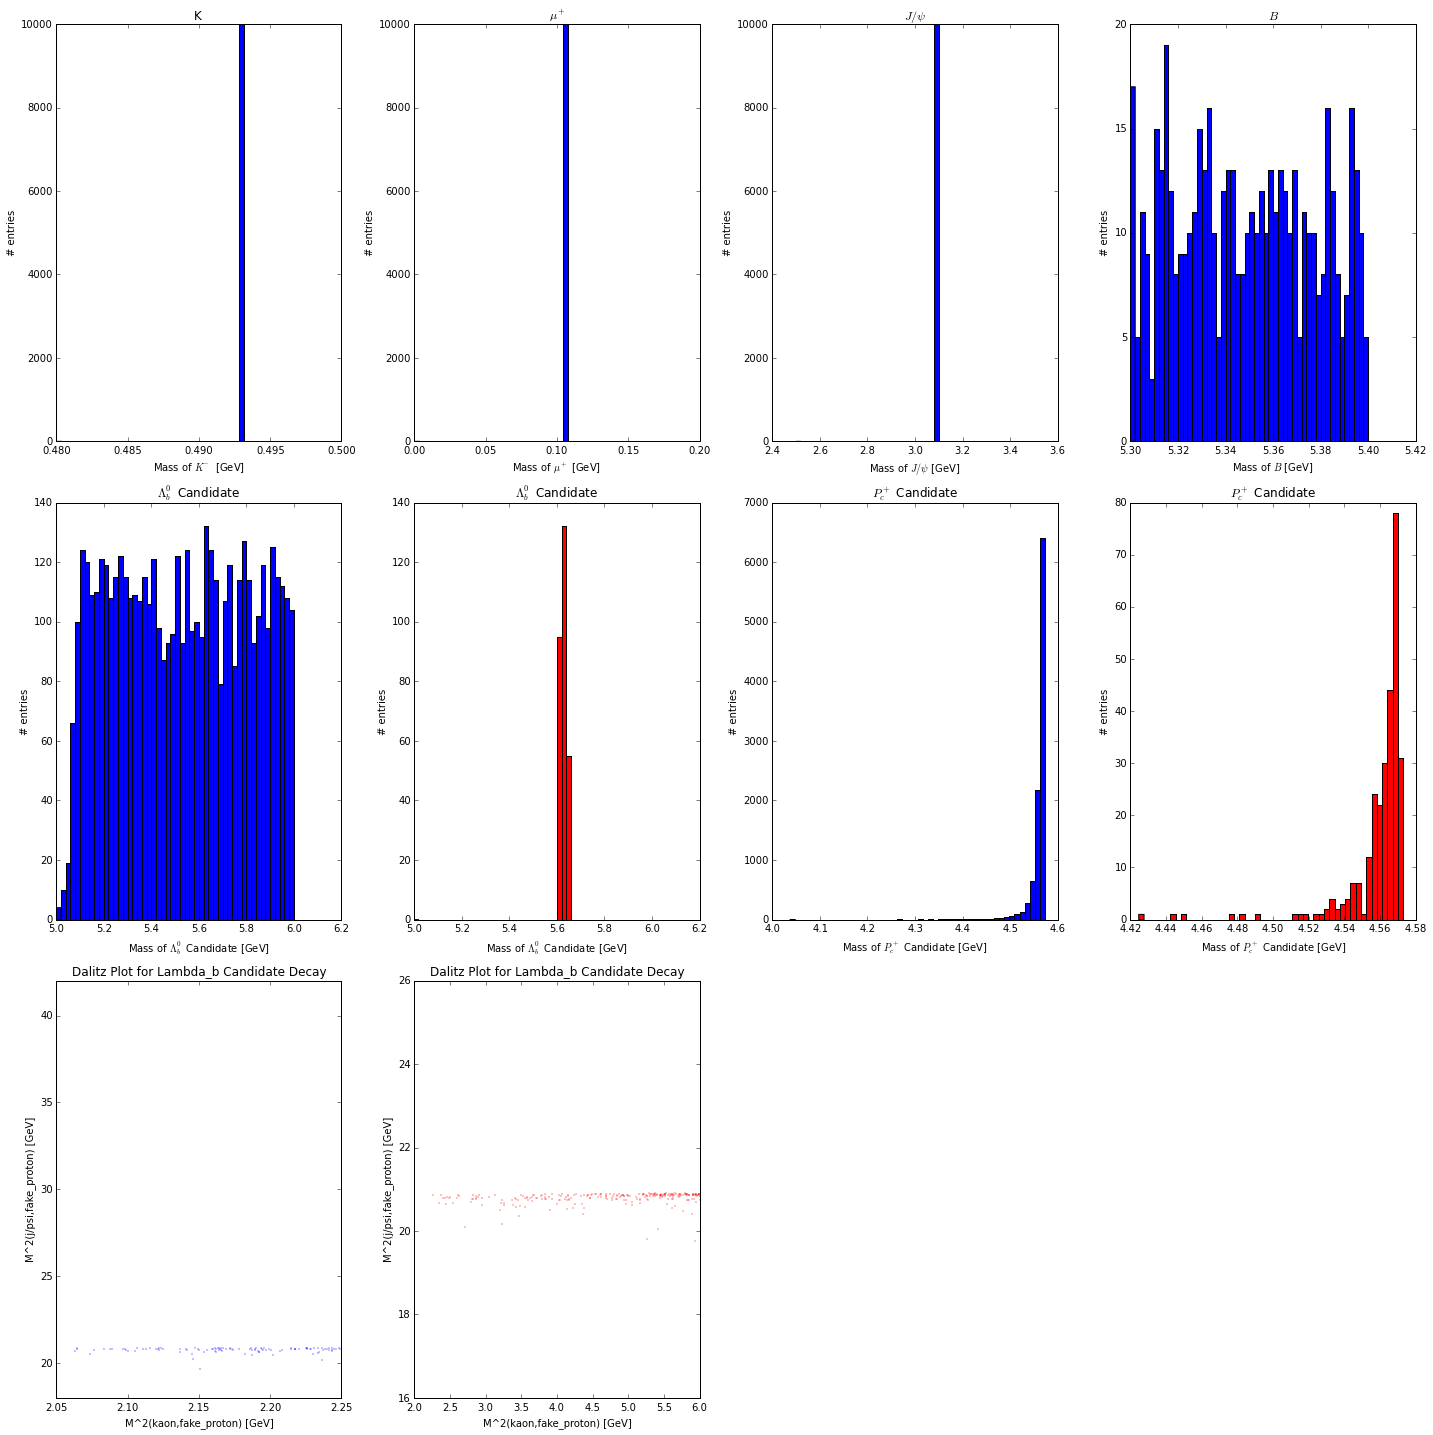

In [20]:
plt.figure(figsize=(20,20))
plt.subplot(3,4,1)
plt.hist(kaon_mass,bins=50,range=(0.48,0.5))
plt.title(r'K')
plt.xlabel(r'Mass of $K^-$ [GeV]')
plt.ylabel('# entries')

plt.subplot(3,4,2)
plt.hist(muon_mass1,bins=50,range=(0,0.2))
plt.title(r'$\mu^+$')
plt.xlabel(r'Mass of $\mu^+$ [GeV]')
plt.ylabel('# entries')

plt.subplot(3,4,3)
plt.hist(jpsi_mass,bins=50,range=(2.5,3.5))
plt.title(r'$J/\psi$')
plt.xlabel(r'Mass of $J/\psi$ [GeV]')
plt.ylabel('# entries')

plt.subplot(3,4,4)
plt.hist(bm_mass,bins=50,range=(5.3,5.4))
plt.title(r'$B$')
plt.xlabel(r'Mass of $B$ [GeV]')
plt.ylabel(r'# entries')

plt.subplot(3,4,5)
plt.hist(fake_lambda_b_mass1,bins=50,range=(5,6))
plt.title(r'$\Lambda_b^0$ Candidate')
plt.xlabel(r'Mass of $\Lambda_b^0$ Candidate [GeV]')
plt.ylabel(r'# entries')

plt.subplot(3,4,7)
plt.hist(pq_mass1,bins=50)
plt.title(r'$P_c^+$ Candidate')
plt.xlabel(r'Mass of $P_c^+$ Candidate [GeV]')
plt.ylabel(r'# entries')

plt.subplot(3,4,9)
plt.plot(x_values1,y_values1,'b.',alpha=1.0,markersize=1.0) # Alpha is transparency
plt.xlabel("M^2(kaon,fake_proton) [GeV]")
plt.ylabel("M^2(j/psi,fake_proton) [GeV]")
plt.title("Dalitz Plot for Lambda_b Candidate Decay")
plt.xlim([2.05,2.25])
plt.ylim([18,42])

jpsi_window = 0.048

index = fake_lambda_b_mass1>5.6
index *= fake_lambda_b_mass1<5.65
index *= jpsi_mass>3.096-jpsi_window
index *= jpsi_mass>3.096+jpsi_window

if len(index[index])>0:

    plt.subplot(3,4,6)
    plt.hist(fake_lambda_b_mass1[index],bins=50,range=(5,6),color='red')
    plt.title(r'$\Lambda_b^0$ Candidate')
    plt.xlabel(r'Mass of $\Lambda_b^0$ Candidate [GeV]')
    plt.ylabel(r'# entries')
    
    plt.subplot(3,4,8)
    plt.hist(pq_mass1[index],bins=50,color='red')
    plt.title(r'$P_c^+$ Candidate')
    plt.xlabel(r'Mass of $P_c^+$ Candidate [GeV]')
    plt.ylabel(r'# entries')
    
    plt.subplot(3,4,10)
    plt.plot(x_values1[index],y_values1[index],'r.',alpha=1.,markersize=1.0) # Alpha is transparency
    plt.xlabel("M^2(kaon,fake_proton) [GeV]")
    plt.ylabel("M^2(j/psi,fake_proton) [GeV]")
    plt.title("Dalitz Plot for Lambda_b Candidate Decay")
    plt.xlim([2,6])
    plt.ylim([16,26])
    

plt.tight_layout()

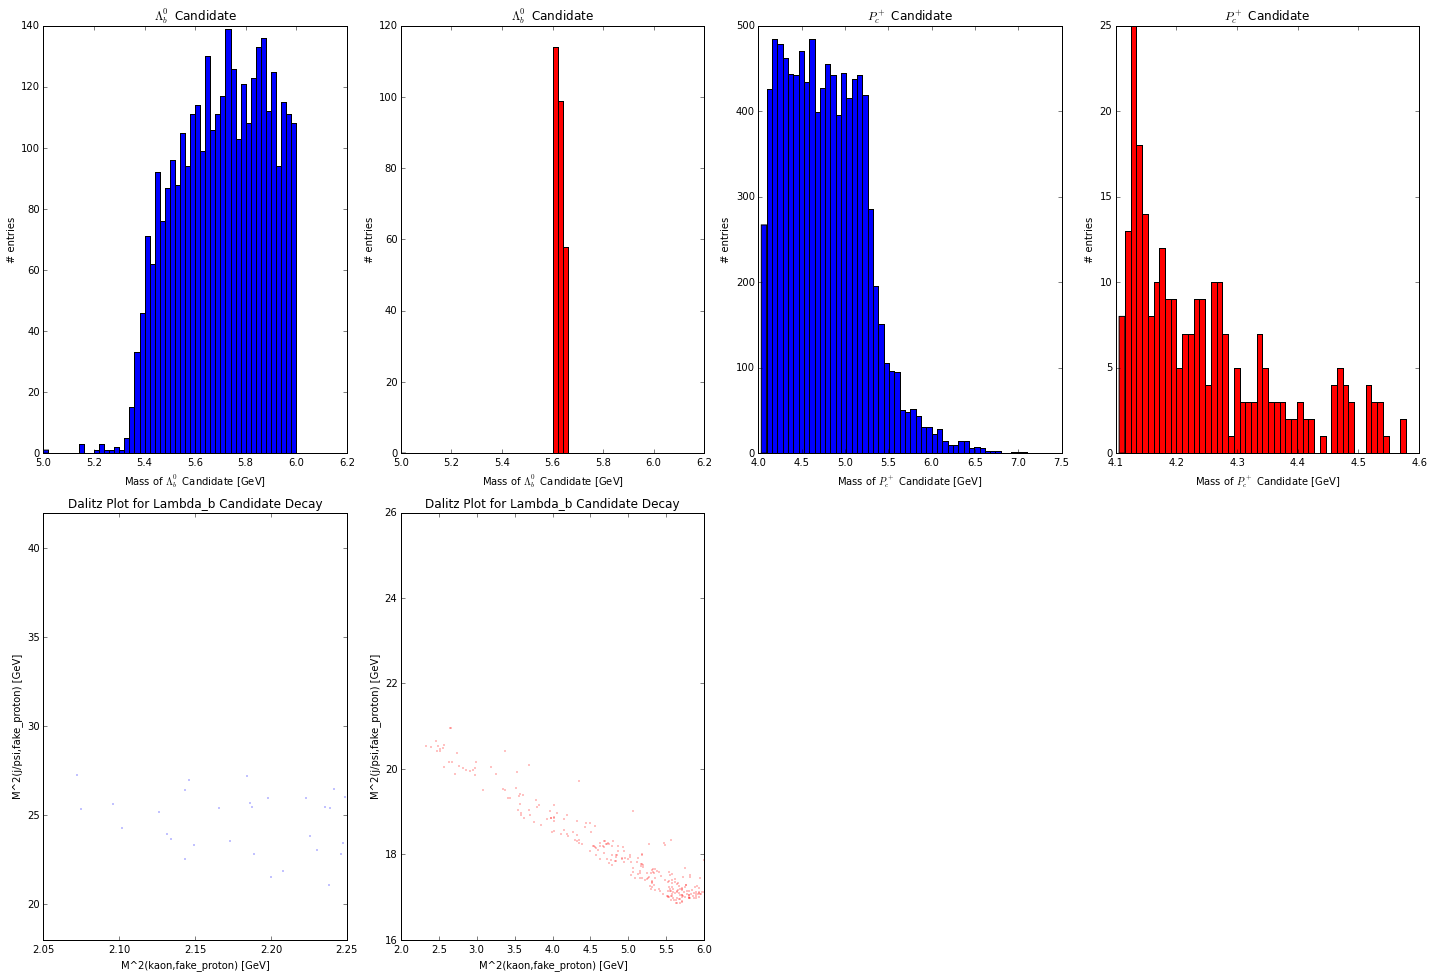

In [21]:
plt.figure(figsize=(20,20))
plt.subplot(3,4,1)
plt.hist(fake_lambda_b_mass2,bins=50,range=(5,6))
plt.title(r'$\Lambda_b^0$ Candidate')
plt.xlabel(r'Mass of $\Lambda_b^0$ Candidate [GeV]')
plt.ylabel(r'# entries')

plt.subplot(3,4,3)
plt.hist(pq_mass2,bins=50)
plt.title(r'$P_c^+$ Candidate')
plt.xlabel(r'Mass of $P_c^+$ Candidate [GeV]')
plt.ylabel(r'# entries')

plt.subplot(3,4,5)
plt.plot(x_values2,y_values2,'b.',alpha=1.0,markersize=1.0) # Alpha is transparency
plt.xlabel("M^2(kaon,fake_proton) [GeV]")
plt.ylabel("M^2(j/psi,fake_proton) [GeV]")
plt.title("Dalitz Plot for Lambda_b Candidate Decay")
plt.xlim([2.05,2.25])
plt.ylim([18,42])

jpsi_window = 0.048

index = fake_lambda_b_mass2>5.6
index *= fake_lambda_b_mass2<5.65
index *= jpsi_mass>3.096-jpsi_window
index *= jpsi_mass>3.096+jpsi_window

if len(index[index])>0:

    plt.subplot(3,4,2)
    plt.hist(fake_lambda_b_mass2[index],bins=50,range=(5,6),color='red')
    plt.title(r'$\Lambda_b^0$ Candidate')
    plt.xlabel(r'Mass of $\Lambda_b^0$ Candidate [GeV]')
    plt.ylabel(r'# entries')
    
    plt.subplot(3,4,4)
    plt.hist(pq_mass2[index],bins=50,color='red')
    plt.title(r'$P_c^+$ Candidate')
    plt.xlabel(r'Mass of $P_c^+$ Candidate [GeV]')
    plt.ylabel(r'# entries')
    
    plt.subplot(3,4,6)
    plt.plot(x_values2[index],y_values2[index],'r.',alpha=1.,markersize=1.0) # Alpha is transparency
    plt.xlabel("M^2(kaon,fake_proton) [GeV]")
    plt.ylabel("M^2(j/psi,fake_proton) [GeV]")
    plt.title("Dalitz Plot for Lambda_b Candidate Decay")
    plt.xlim([2,6])
    plt.ylim([16,26])
    

plt.tight_layout()